In [10]:
import pandas as pd 
import numpy as np 
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt
from backtest_utiles import *
from itertools import combinations
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

In [2]:
df = pd.read_csv('SPX_components_close_data.csv').set_index('Date')
df.index = pd.to_datetime(df.index)
df_last_yr = df[df.index>='2022-01-01']
coint_test_list = select_stock_pairs_from_correlation(df_period=df_last_yr, 
                                                        top_corr_pairs=15,
                                                        drop_correlation=0.97)
coint_pairs = find_cointegrated_pairs(df_period=df_last_yr, 
                                      coint_test_list=coint_test_list,
                                      p_value_threshold=0.01)

In [3]:
coint_pairs

[('PHM', 'LEN', 0.008034695794772112),
 ('MLM', 'LRCX', 0.005662451950343634),
 ('MLM', 'MAR', 0.0012817968759439994),
 ('LRCX', 'MAR', 0.00040579964354091786),
 ('MAR', 'VMC', 0.004909521644361649)]

<AxesSubplot:xlabel='Date'>

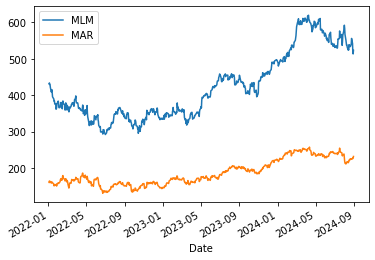

In [12]:
df_last_yr[['MLM', 'MAR']].plot()

In [21]:
# construct spreads
# 0
x = np.log(df_last_yr['MLM'].values)
x_const = sm.add_constant(x)
# 1
y = np.log(df_last_yr['MAR'])
linear_reg = sm.OLS(y, x_const)
result = linear_reg.fit()
alpha = result.params[0]
beta = result.params[1]
df_spread = pd.DataFrame(np.log(df_last_yr['MLM']) - np.log(df_last_yr['MAR'])*beta-alpha)

<AxesSubplot:xlabel='Date'>

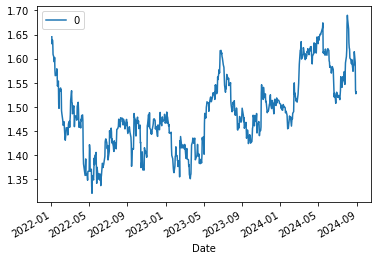

In [22]:
df_spread.plot()